**Target Variable(s): Executive Function Scores**

1. Interference
2. Working Memory
3. Cognitive Flexibility

# Data Import + Wrangling

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import scipy.stats as stats

In [5]:
data = pd.ExcelFile('/Users/springboard/Desktop/Capstone-Project/Obesity.xlsx')

df = data.parse('Full sample_EF_excel')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 25 columns):
Reference_no              513 non-null int64
Actual_age_C              513 non-null float64
Sex                       513 non-null int64
Weight                    513 non-null float64
Height_meter              513 non-null float64
BMI                       513 non-null float64
BMI_for_age               513 non-null float64
Physical_fitness_score    513 non-null float64
PFS_CAT                   513 non-null int64
Breakfast                 513 non-null int64
Lunch                     513 non-null int64
Dinner                    513 non-null int64
PA_total_score            513 non-null float64
PA_CAT                    513 non-null int64
Sleep_weekdays            513 non-null float64
Sleep_weekend             513 non-null float64
Sleep_percent             513 non-null float64
Global_sleep_CAT          513 non-null int64
Household_size            486 non-null float64
Income_CAT        

In [7]:
df.head()

,Reference_no,Actual_age_C,Sex,Weight,Height_meter,BMI,BMI_for_age,Physical_fitness_score,PFS_CAT,Breakfast,...,Sleep_weekend,Sleep_percent,Global_sleep_CAT,Household_size,Income_CAT,Edu_father,Edu_mother,Interference_score_ALL,WM_total,CF_total
0,1,12.106776,2,30.6,1.420,15.175560,-1.51,54.545455,1,7,...,7.25,95.238095,1,6.0,2.0,3.0,3.0,10.409091,16,18.00
1,2,12.114990,1,33.4,1.492,15.004061,-1.60,62.500000,2,7,...,11.50,95.652174,0,4.0,3.0,4.0,3.0,-2.697183,16,27.00
2,3,12.125941,1,66.8,1.518,28.988979,2.86,55.045872,2,6,...,8.00,91.428571,1,3.0,1.0,3.0,2.0,6.598361,16,4.31
3,4,12.139630,1,40.4,1.466,18.798077,0.53,56.206089,2,7,...,11.00,76.190476,1,4.0,1.0,3.0,4.0,1.454545,15,45.16
4,5,12.167009,2,40.1,1.475,18.431485,0.12,63.829787,2,7,...,11.25,98.876404,0,3.0,1.0,2.0,3.0,0.291339,15,15.07


In [8]:
# Drop duplicate data (if any)

df.drop_duplicates()

,Reference_no,Actual_age_C,Sex,Weight,Height_meter,BMI,BMI_for_age,Physical_fitness_score,PFS_CAT,Breakfast,...,Sleep_weekend,Sleep_percent,Global_sleep_CAT,Household_size,Income_CAT,Edu_father,Edu_mother,Interference_score_ALL,WM_total,CF_total
0,1,12.106776,2,30.6,1.4200,15.175560,-1.51,54.545455,1,7,...,7.25,95.238095,1,6.0,2.0,3.0,3.0,10.409091,16,18.00
1,2,12.114990,1,33.4,1.4920,15.004061,-1.60,62.500000,2,7,...,11.50,95.652174,0,4.0,3.0,4.0,3.0,-2.697183,16,27.00
2,3,12.125941,1,66.8,1.5180,28.988979,2.86,55.045872,2,6,...,8.00,91.428571,1,3.0,1.0,3.0,2.0,6.598361,16,4.31
3,4,12.139630,1,40.4,1.4660,18.798077,0.53,56.206089,2,7,...,11.00,76.190476,1,4.0,1.0,3.0,4.0,1.454545,15,45.16
4,5,12.167009,2,40.1,1.4750,18.431485,0.12,63.829787,2,7,...,11.25,98.876404,0,3.0,1.0,2.0,3.0,0.291339,15,15.07
5,6,12.180698,1,53.5,1.6600,19.415009,0.76,56.074766,2,2,...,12.00,70.000000,1,4.0,3.0,4.0,4.0,2.657534,17,24.40
6,7,12.183436,1,31.4,1.4650,14.630339,-1.92,79.207921,3,5,...,9.50,95.238095,0,7.0,1.0,3.0,3.0,5.225806,26,33.00
7,8,12.197125,1,61.4,1.5640,25.101223,2.26,73.394495,3,5,...,6.00,100.000000,1,6.0,3.0,4.0,4.0,0.939394,13,33.96
8,9,12.213552,2,46.4,1.5300,19.821436,0.62,66.666667,3,0,...,10.00,70.422535,1,6.0,3.0,4.0,4.0,-7.417178,16,15.70
9,10,12.213552,2,27.0,1.3990,13.795211,-2.54,58.394161,2,7,...,8.00,100.000000,1,5.0,2.0,3.0,3.0,-3.853659,17,36.99


In [9]:
# Drop 27 rows corresponding to 27 missing values
# Missing values found in 'Household_size', 'Income_CAT', 'Edu_father', and 'Edu_mother'

df_cleaned = df.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 512
Data columns (total 25 columns):
Reference_no              486 non-null int64
Actual_age_C              486 non-null float64
Sex                       486 non-null int64
Weight                    486 non-null float64
Height_meter              486 non-null float64
BMI                       486 non-null float64
BMI_for_age               486 non-null float64
Physical_fitness_score    486 non-null float64
PFS_CAT                   486 non-null int64
Breakfast                 486 non-null int64
Lunch                     486 non-null int64
Dinner                    486 non-null int64
PA_total_score            486 non-null float64
PA_CAT                    486 non-null int64
Sleep_weekdays            486 non-null float64
Sleep_weekend             486 non-null float64
Sleep_percent             486 non-null float64
Global_sleep_CAT          486 non-null int64
Household_size            486 non-null float64
Income_CAT        

In [10]:
# Summary statistics

df_cleaned.describe()

,Reference_no,Actual_age_C,Sex,Weight,Height_meter,BMI,BMI_for_age,Physical_fitness_score,PFS_CAT,Breakfast,...,Sleep_weekend,Sleep_percent,Global_sleep_CAT,Household_size,Income_CAT,Edu_father,Edu_mother,Interference_score_ALL,WM_total,CF_total
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,...,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,256.069959,14.075512,1.604938,51.867695,1.564756,21.004273,0.221049,62.973417,2.267490,4.213992,...,8.771770,82.883973,0.724280,5.462963,1.888889,3.277778,3.277778,1.340364,17.306584,27.630988
std,148.917535,1.322689,0.489368,14.870932,0.080929,5.089657,1.515608,12.155276,0.975183,2.392318,...,2.006336,17.249667,0.447337,1.614901,0.807184,0.577053,0.587674,6.563426,3.762901,19.443671
min,1.000000,12.106776,1.000000,24.200000,1.365000,12.988233,-3.950000,19.543974,1.000000,0.000000,...,2.500000,19.317450,0.000000,2.000000,1.000000,1.000000,1.000000,-20.792857,10.000000,-15.000000
25%,127.250000,12.985626,1.000000,41.600000,1.508125,17.328972,-0.885000,55.813953,2.000000,2.000000,...,7.500000,74.074074,0.000000,4.000000,1.000000,3.000000,3.000000,-2.850857,15.000000,14.392500
50%,256.500000,13.655031,2.000000,48.800000,1.558500,19.850710,0.235000,60.913706,2.000000,4.000000,...,9.000000,87.500000,1.000000,5.000000,2.000000,3.000000,3.000000,0.946207,17.000000,23.000000
75%,385.750000,15.482546,2.000000,58.950000,1.618625,23.462314,1.267500,69.114578,3.000000,7.000000,...,10.000000,96.774194,1.000000,6.000000,3.000000,4.000000,4.000000,5.245677,19.000000,36.207500
max,513.000000,16.970000,2.000000,117.500000,1.875000,42.743375,4.160000,126.315789,5.000000,7.000000,...,14.000000,101.818182,1.000000,12.000000,3.000000,4.000000,4.000000,27.471264,30.000000,136.620000


# Data Storytelling

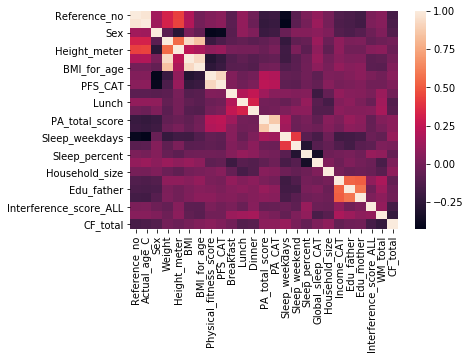

In [11]:
# Correlation Matrix
sns.heatmap(df_cleaned.corr())

In [12]:
df_cleaned.corr()

,Reference_no,Actual_age_C,Sex,Weight,Height_meter,BMI,BMI_for_age,Physical_fitness_score,PFS_CAT,Breakfast,...,Sleep_weekend,Sleep_percent,Global_sleep_CAT,Household_size,Income_CAT,Edu_father,Edu_mother,Interference_score_ALL,WM_total,CF_total
Reference_no,1.000000,0.975941,0.148239,0.321431,0.428171,0.197121,-0.006866,0.038693,0.066218,-0.088661,...,-0.097799,0.021000,0.097075,0.007110,-0.119251,-0.146180,-0.171999,0.024539,0.058661,-0.160566
Actual_age_C,0.975941,1.000000,0.137328,0.326611,0.440337,0.198948,-0.005507,0.046706,0.074000,-0.088767,...,-0.089508,0.002914,0.120973,0.001018,-0.132843,-0.151824,-0.177390,0.028833,0.054462,-0.146156
Sex,0.148239,0.137328,1.000000,-0.089588,-0.266859,0.018108,-0.060265,-0.412361,-0.395942,-0.100235,...,0.052898,0.050042,0.075931,0.033627,-0.116575,-0.136293,-0.105152,-0.027108,0.032319,-0.115450
Weight,0.321431,0.326611,-0.089588,1.000000,0.556945,0.933468,0.848731,-0.206079,-0.138880,-0.084497,...,-0.073185,-0.047061,0.122822,-0.034320,0.081841,0.022552,0.027713,-0.051976,-0.028570,-0.002099
Height_meter,0.428171,0.440337,-0.266859,0.556945,1.000000,0.235721,0.179160,0.087528,0.120497,0.013784,...,0.022278,-0.084594,0.085762,-0.073505,0.082501,-0.008216,-0.008002,0.057463,0.071683,-0.031656
BMI,0.197121,0.198948,0.018108,0.933468,0.235721,1.000000,0.929111,-0.287882,-0.225078,-0.110866,...,-0.092360,-0.023744,0.112116,-0.007011,0.060555,0.026843,0.031946,-0.084408,-0.070478,0.007380
BMI_for_age,-0.006866,-0.005507,-0.060265,0.848731,0.179160,0.929111,1.000000,-0.250513,-0.203712,-0.098423,...,-0.089806,-0.017151,0.081657,0.011923,0.101454,0.058321,0.072476,-0.089399,-0.094135,0.038542
Physical_fitness_score,0.038693,0.046706,-0.412361,-0.206079,0.087528,-0.287882,-0.250513,1.000000,0.922814,0.040718,...,-0.070137,-0.018324,-0.074415,0.030341,0.015444,0.047166,0.073333,0.022731,-0.009480,0.069322
PFS_CAT,0.066218,0.074000,-0.395942,-0.138880,0.120497,-0.225078,-0.203712,0.922814,1.000000,0.034628,...,-0.081577,-0.019933,-0.057457,0.056056,0.006403,0.021577,0.042774,-0.010639,-0.012281,0.035221
Breakfast,-0.088661,-0.088767,-0.100235,-0.084497,0.013784,-0.110866,-0.098423,0.040718,0.034628,1.000000,...,0.038986,0.049262,-0.195219,-0.052381,0.094555,0.058415,0.048560,0.017499,0.121877,-0.011434


<div class="span5 alert alert-success">
<p>...</p>
</div>

# Linear Regression

**Target Variable #1: Interference**

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score

In [14]:
# Create feature and target arrays

X = df_cleaned.drop(['Interference_score_ALL', 'WM_total', 'CF_total'], axis=1).values
y = df_cleaned['Interference_score_ALL'].values

In [15]:
# Split into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=50)

In [16]:
# Fit the regressor to the training data 

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
# Predict on the test data

y_pred = reg.predict(X_test)

In [48]:
reg.coef_

array([-9.87510837e-03,  7.00693629e-01, -6.38851682e-02, -9.61203960e-02,
        1.70122937e+01,  1.50354048e-01, -4.81803693e-01,  5.49305576e-02,
       -7.57949645e-01,  1.41593610e-02, -2.11408656e-01,  1.98238260e-01,
       -1.05116661e+00,  2.21772653e-02,  2.80220046e-03, -3.81455197e-01,
        1.99538301e-02, -1.74000892e-01, -3.26355662e-01,  7.05982380e-01,
       -1.33373039e+00, -1.23676787e-01])

In [49]:
reg.intercept_

-22.619836307684817

In [18]:
# R^2 and RMSE

print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: -0.04528804067546788
Root Mean Squared Error: 6.923291878697909


R^2 is the percentage of variance in the response variable. In this case, R^2 signifies that 4.5% of Interference scores can be explained by all of the predictor variables.

In [19]:
cv_scores_int = cross_val_score(reg, X, y, cv=5)
cv_scores_int

array([ 0.01246433, -0.11450714, -0.04716789, -0.07152517,  0.02196458])

In [20]:
print("Average 5-Fold CV Score for Interference: {}".format(np.mean(cv_scores_int)))

Average 5-Fold CV Score for Interference: -0.039754257345679236


In [21]:
# Ridge Regression

from sklearn.linear_model import Ridge

ridge_int = Ridge(alpha=0.1, normalize=True)
ridge_int.fit(X_train, y_train)
ridge_int_pred = ridge_int.predict(X_test)
ridge_int.score(X_test, y_test)

-0.035185037005275976

In [22]:
# Lasso Regression

from sklearn.linear_model import Lasso

lasso_int = Lasso(alpha=0.1, normalize=True)
lasso_int.fit(X_train, y_train)
lasso_int_pred = lasso_int.predict(X_test)
lasso_int.score(X_test, y_test)

-1.2577719145312471e-05

In [23]:
names = df_cleaned.drop(['Interference_score_ALL', 'WM_total', 'CF_total'], axis=1).columns

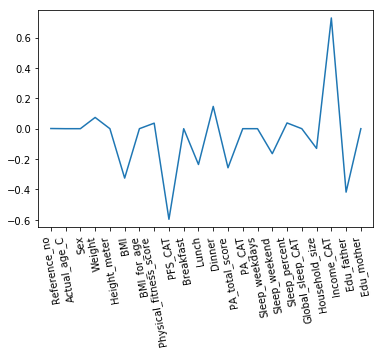

In [24]:
lasso_graph_1 = Lasso(alpha=0.1)
lasso_coef_1 = lasso_graph_1.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef_1)
_ = plt.xticks(range(len(names)), names, rotation=100)
_ = plt.margins(0.04)
plt.show()

**Target Variable #2: Working Memory**

In [25]:
# Create target array

y_WM = df_cleaned['WM_total'].values

In [26]:
# Split into training and test sets

X_train_WM, X_test_WM, y_train_WM, y_test_WM = train_test_split(X, y_WM, test_size = 0.3, random_state=50)

In [27]:
# Fit the regressor to the training data 

reg_WM = LinearRegression()
reg_WM.fit(X_train_WM, y_train_WM)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
# Predict on the test data

y_pred_WM = reg_WM.predict(X_test_WM)

In [50]:
reg_WM.coef_

array([ 1.77831946e-03, -7.48752215e-02,  5.12361283e-01, -5.80498315e-02,
        5.31907556e+00,  1.15472575e-01, -1.83828370e-01,  1.27667370e-02,
       -4.73189663e-03,  8.14363910e-02,  1.94007093e-01,  1.49739876e-01,
        4.11062991e-01,  3.35593396e-02, -2.54229395e-02,  1.04047688e-01,
        1.25898883e-02, -6.63791102e-01, -1.84614284e-01,  9.55534783e-01,
        8.57804981e-01, -8.04744641e-01])

In [51]:
reg_WM.intercept_

3.2067382004029685

In [29]:
# R^2 and RMSE

print("R^2: {}".format(reg_WM.score(X_test_WM, y_test_WM)))
rmse = np.sqrt(mean_squared_error(y_test_WM, y_pred_WM))
print("Root Mean Squared Error: {}".format(rmse))

R^2: -0.1102424514900393
Root Mean Squared Error: 3.521750259497867


In [30]:
cv_scores_WM = cross_val_score(reg_WM, X, y_WM, cv=5)
cv_scores_WM

array([ 0.14395594, -0.01156074,  0.01162106,  0.04352322, -0.1348373 ])

In [31]:
print("Average 5-Fold CV Score for Working Memory: {}".format(np.mean(cv_scores_WM)))

Average 5-Fold CV Score for Working Memory: 0.010540435513117874


In [32]:
# Ridge Regression

ridge_WM = Ridge(alpha=0.1, normalize=True)
ridge_WM.fit(X_train_WM, y_train_WM)
ridge_WM_pred = ridge_WM.predict(X_test_WM)
ridge_WM.score(X_test_WM, y_test_WM)

-0.07680587528425731

In [33]:
# Lasso Regression

lasso_WM = Lasso(alpha=0.1, normalize=True)
lasso_WM.fit(X_train_WM, y_train_WM)
lasso_WM_pred = lasso_WM.predict(X_test_WM)
lasso_WM.score(X_test_WM, y_test_WM)

-0.017968289603938148

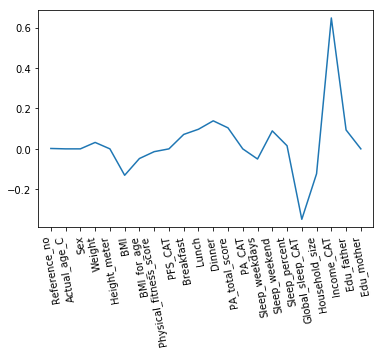

In [34]:
lasso_graph_2 = Lasso(alpha=0.1)
lasso_coef_2 = lasso_graph_2.fit(X, y_WM).coef_
_ = plt.plot(range(len(names)), lasso_coef_2)
_ = plt.xticks(range(len(names)), names, rotation=100)
_ = plt.margins(0.04)
plt.show()

**Target Variable #3: Cognitive Flexibility**

In [35]:
# Create target array

y_CF = df_cleaned['CF_total'].values

In [36]:
# Split into training and test sets

X_train_CF, X_test_CF, y_train_CF, y_test_CF = train_test_split(X, y_CF, test_size = 0.3, random_state=50)

In [37]:
# Fit the regressor to the training data 

reg_CF = LinearRegression()
reg_CF.fit(X_train_CF, y_train_CF)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
# Predict on the test data

y_pred_CF = reg_CF.predict(X_test_CF)

In [52]:
reg_CF.coef_

array([-8.54213462e-02,  6.30007412e+00, -3.22819491e+00,  8.51133158e-01,
       -4.28063481e+01, -8.26989481e-01, -3.09103134e+00,  5.96615077e-01,
       -6.80725217e+00, -3.87882913e-01, -5.21799469e-01,  3.65558199e-02,
        3.11688148e+00, -3.48886186e+00,  4.31294071e-01,  9.90033248e-02,
       -1.16761791e-02,  3.32064845e+00,  9.31477719e-01, -2.30711973e-01,
       -8.40089938e-02, -1.15904050e+00])

In [53]:
reg_CF.intercept_

-18.806596118789777

In [39]:
# R^2 and RMSE

print("R^2: {}".format(reg_CF.score(X_test_CF, y_test_CF)))
rmse = np.sqrt(mean_squared_error(y_test_CF, y_pred_CF))
print("Root Mean Squared Error: {}".format(rmse))

R^2: -0.11082800923604497
Root Mean Squared Error: 19.157887828827203


In [40]:
cv_scores_CF = cross_val_score(reg_CF, X, y_CF, cv=5)
cv_scores_CF

array([-0.02074765, -0.0426676 , -0.20274335, -0.17042925, -0.19530124])

In [41]:
print("Average 5-Fold CV Score for Cognitive Flexibility: {}".format(np.mean(cv_scores_CF)))

Average 5-Fold CV Score for Cognitive Flexibility: -0.12637781587400254


In [42]:
# Ridge Regression 

ridge_CF = Ridge(alpha=0.1, normalize=True)
ridge_CF.fit(X_train_CF, y_train_CF)
ridge_CF_pred = ridge_CF.predict(X_test_CF)
ridge_CF.score(X_test_CF, y_test_CF)

-0.0035139260552905505

In [43]:
# Lasso Regression

lasso_CF = Lasso(alpha=0.1, normalize=True)
lasso_CF.fit(X_train_CF, y_train_CF)
lasso_CF_pred = lasso_CF.predict(X_test_CF)
lasso_WM.score(X_test_CF, y_test_CF)

-0.2634400796063401

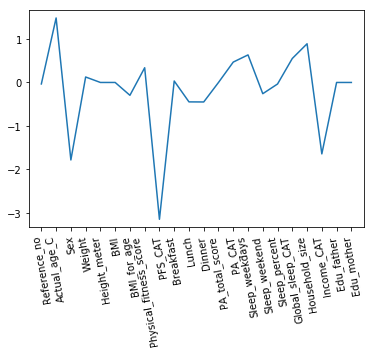

In [44]:
lasso_graph_3 = Lasso(alpha=0.1)
lasso_coef_3 = lasso_graph_3.fit(X, y_CF).coef_
_ = plt.plot(range(len(names)), lasso_coef_3)
_ = plt.xticks(range(len(names)), names, rotation=100)
_ = plt.margins(0.04)
plt.show()

# Hyperparameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV

In [65]:
# Range of alpha values to test 

alphas = np.array([1, 0.1, 0.01, 0.001, 0.0001, 0])

# GridSearch - Interference Score

ridge_obj = Ridge()
grid_INT = GridSearchCV(estimator=ridge_obj, param_grid=dict(alpha=alphas), cv=5)
grid_INT.fit(X_train, y_train)

print('Best Score (Interference): ' + str(grid_INT.best_score_))
print('Best Alpha: ' + str(grid_INT.best_estimator_.alpha))

Best Score (Interference): -0.09209130676067367
Best Alpha: 1.0


In [66]:
# GridSearch - Working Memory

ridge_obj = Ridge()
grid_WM = GridSearchCV(estimator=ridge_obj, param_grid=dict(alpha=alphas), cv=5)
grid_WM.fit(X_train_WM, y_train_WM)

print('Best Score (Working Memory): ' + str(grid_WM.best_score_))
print('Best Alpha: ' + str(grid_WM.best_estimator_.alpha))

Best Score (Working Memory): 0.043677800640524976
Best Alpha: 1.0


In [67]:
# GridSearch - Cognitive Flexibility

ridge_obj = Ridge()
grid_CF = GridSearchCV(estimator=ridge_obj, param_grid=dict(alpha=alphas), cv=5)
grid_CF.fit(X_train_CF, y_train_CF)

print('Best Score (Cognitive Flexibility): ' + str(grid_CF.best_score_))
print('Best Alpha: ' + str(grid_CF.best_estimator_.alpha))

Best Score (Cognitive Flexibility): -0.0840293201580874
Best Alpha: 1.0
